In [1]:
import numpy as np
import pandas as pd

In [2]:
! git clone 'https://github.com/rohithkumar7582/Crypto_Forecasting_LSTM.git'

Cloning into 'Crypto_Forecasting_LSTM'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 28 (delta 1), reused 28 (delta 1), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from xgboost import XGBRegressor

In [5]:
df_bitcoin = pd.read_csv('/content/Crypto_Forecasting_LSTM/crypto-dataset/Bitcoin/BTC-USD.csv')
df_dogecoin = pd.read_csv('/content/Crypto_Forecasting_LSTM/crypto-dataset/Dogecoin/DOGE-USD.csv')
df_ethereum = pd.read_csv('/content/Crypto_Forecasting_LSTM/crypto-dataset/Ethereum/ETH-USD.csv')
df_solana = pd.read_csv('/content/Crypto_Forecasting_LSTM/crypto-dataset/Solana/SOL1-USD.csv')

In [6]:
df_bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-13,235.242004,235.934998,229.332001,230.511993,230.511993,18478800.0
1,2015-09-14,230.608994,232.440002,227.960999,230.643997,230.643997,20997800.0
2,2015-09-15,230.492004,259.182007,229.822006,230.304001,230.304001,19177800.0
3,2015-09-16,230.250000,231.214996,227.401993,229.091003,229.091003,20144200.0
4,2015-09-17,229.076004,230.285004,228.925995,229.809998,229.809998,18935400.0


In [7]:
df_bitcoin['Date']=pd.to_datetime(df_bitcoin['Date'])
df_dogecoin['Date']=pd.to_datetime(df_dogecoin['Date'])
df_ethereum['Date']=pd.to_datetime(df_ethereum['Date'])
df_solana['Date']=pd.to_datetime(df_solana['Date'])

In [8]:
df_solana.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-22,2.773688,2.994370,2.668603,2.915519,2.915519,18556523.0
1,2020-09-23,2.915482,3.068649,2.728075,2.846996,2.846996,14416287.0
2,2020-09-24,2.846996,3.253473,2.797281,3.151377,3.151377,16989026.0
3,2020-09-25,3.159573,3.271722,2.913430,3.191359,3.191359,13961117.0
4,2020-09-26,3.193931,3.230423,3.039811,3.139166,3.139166,8877567.0


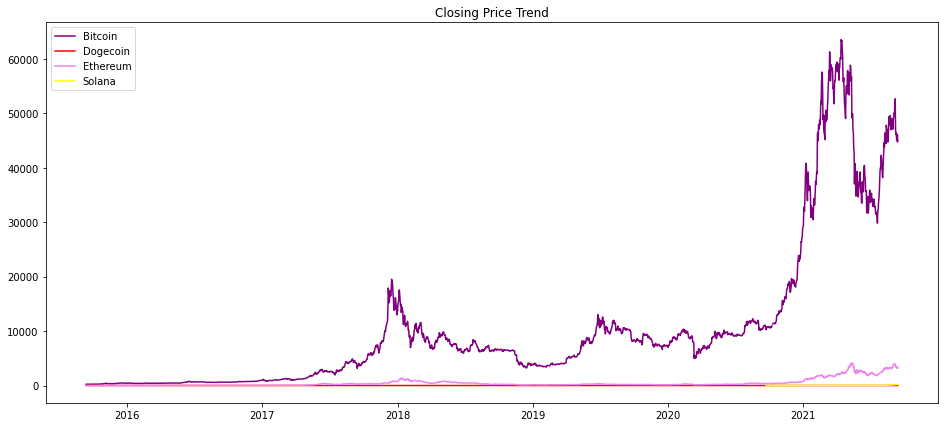

In [9]:
fig = plt.figure(figsize = (16,7))

plt.plot(df_bitcoin.Date,df_bitcoin.Close,color='purple')
plt.plot(df_dogecoin.Date,df_dogecoin.Close,color='red')
plt.plot(df_ethereum.Date,df_ethereum.Close,color='violet')
plt.plot(df_solana.Date,df_solana.Close,color='yellow')

plt.title('Closing Price Trend')
plt.legend(['Bitcoin','Dogecoin','Ethereum','Solana'])
plt.show()

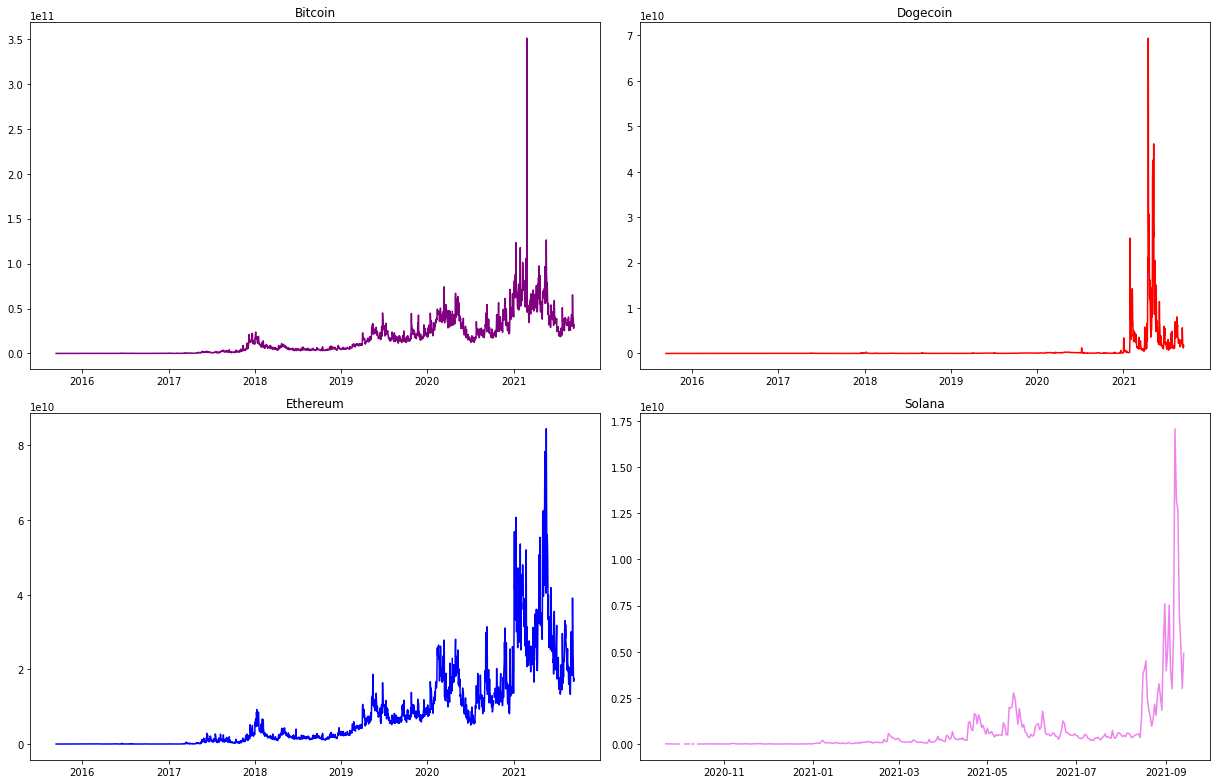

In [10]:
fig = plt.figure(figsize = (17,11))

plt.subplot(2,2,1)
plt.plot(df_bitcoin.Date,df_bitcoin.Volume,color='purple')
plt.title('Bitcoin')


plt.subplot(2,2,2)
plt.plot(df_dogecoin.Date,df_dogecoin.Volume,color='red')
plt.title('Dogecoin')

plt.subplot(2,2,3)

plt.plot(df_ethereum.Date,df_ethereum.Volume,color='blue')
plt.title('Ethereum')


plt.subplot(2,2,4)

plt.plot(df_solana.Date,df_solana.Volume,color='violet')
plt.title('Solana')

fig.tight_layout()

In [11]:
two_year_bitcoin=df_bitcoin[df_bitcoin.Date>'2019-09']
two_year_dogecoin=dogecoin=df_dogecoin[df_dogecoin.Date>'2019-09']
two_year_ethereum=df_ethereum[df_ethereum.Date>'2019-09']
two_year_solana=df_solana[df_solana.Date>'2019-09']

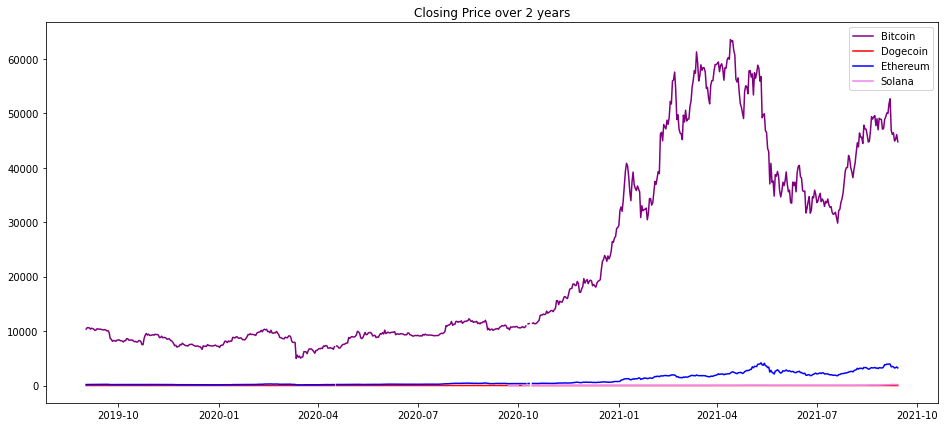

In [12]:
fig = plt.figure(figsize = (16,7))

plt.plot(two_year_bitcoin.Date,two_year_bitcoin.Close,color='purple')
plt.plot(two_year_dogecoin.Date,two_year_dogecoin.Close,color='red')
plt.plot(two_year_ethereum.Date,two_year_ethereum.Close,color='blue')
plt.plot(two_year_solana.Date,two_year_solana.Close,color='violet')
plt.title('Closing Price over 2 years')
plt.legend(['Bitcoin','Dogecoin','Ethereum','Solana'])
plt.show()

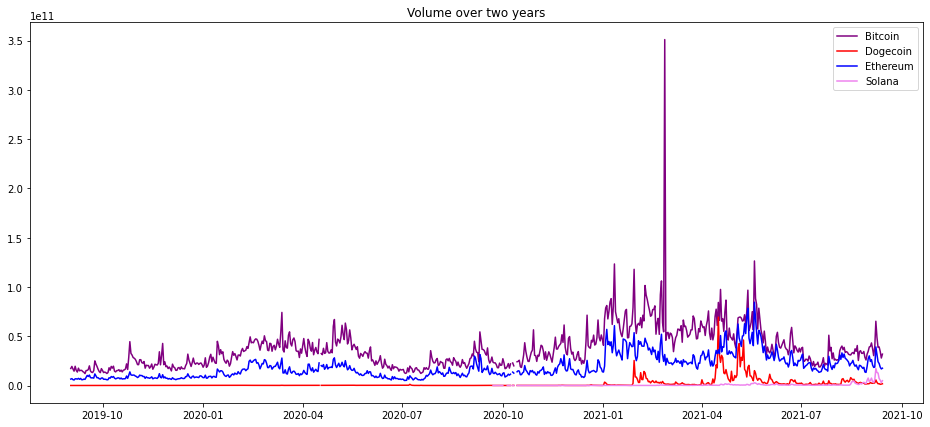

In [13]:
fig = plt.figure(figsize = (16,7))

plt.plot(two_year_bitcoin.Date,two_year_bitcoin.Volume,color='purple')
plt.plot(two_year_dogecoin.Date,two_year_dogecoin.Volume,color='red')
plt.plot(two_year_ethereum.Date,two_year_ethereum.Volume,color='blue')
plt.plot(two_year_solana.Date,two_year_solana.Volume,color='violet')

plt.title('Volume over two years')
plt.legend(['Bitcoin','Dogecoin','Ethereum','Solana'])
plt.show()

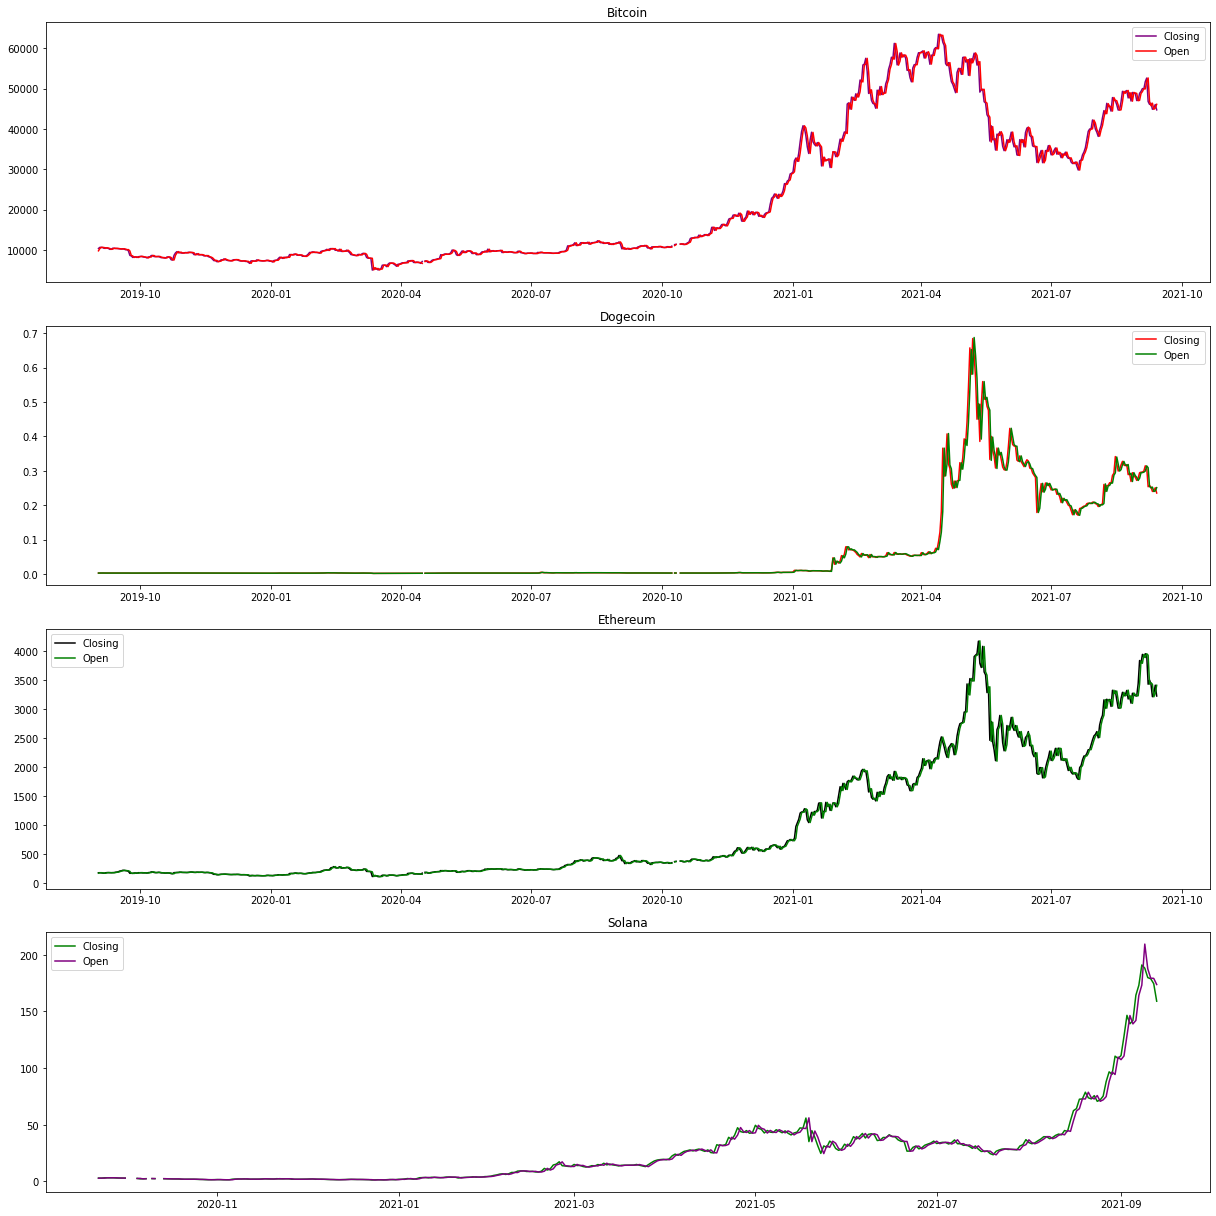

In [14]:
fig = plt.figure(figsize = (17,17))

plt.subplot(4, 1, 1)
plt.plot(two_year_bitcoin.Date,two_year_bitcoin['Close'],color='purple')
plt.plot(two_year_bitcoin.Date,two_year_bitcoin['Open'],color='red')
plt.legend(['Closing','Open'])
plt.title('Bitcoin')

plt.subplot(4, 1, 2)
plt.plot(two_year_dogecoin.Date,two_year_dogecoin['Close'],color='red')
plt.plot(two_year_dogecoin.Date,two_year_dogecoin['Open'],color='green')
plt.legend(['Closing','Open'])
plt.title('Dogecoin')

plt.subplot(4, 1, 3)
plt.plot(two_year_ethereum.Date,two_year_ethereum['Close'],color='black')
plt.plot(two_year_ethereum.Date,two_year_ethereum['Open'],color='green')
plt.legend(['Closing','Open'])
plt.title('Ethereum')

plt.subplot(4, 1, 4)
plt.plot(two_year_solana.Date,two_year_solana['Close'],color='green')
plt.plot(two_year_solana.Date,two_year_solana['Open'],color='purple')
plt.legend(['Closing','Open'])
plt.title('Solana')


fig.tight_layout()

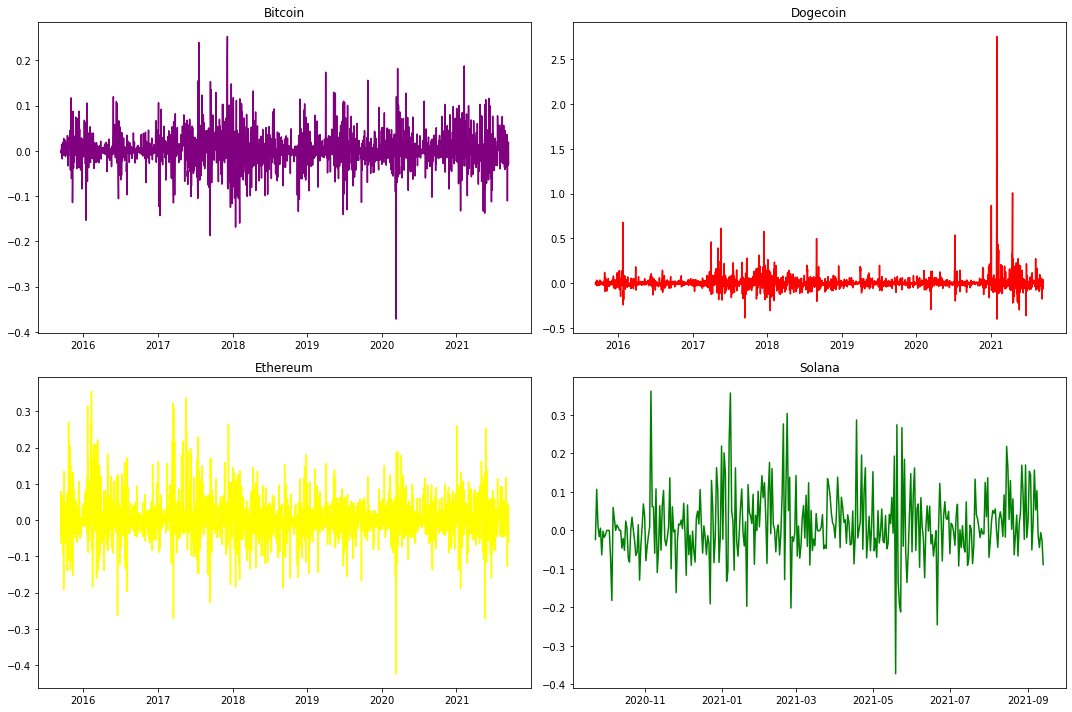

In [15]:
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(df_bitcoin.Date,df_bitcoin['Adj Close'].pct_change(),color='purple')
plt.title('Bitcoin')

plt.subplot(2, 2, 2)
plt.plot(df_dogecoin.Date,df_dogecoin['Adj Close'].pct_change(),color='red')
plt.title('Dogecoin')

plt.subplot(2, 2, 3)
plt.plot(df_ethereum.Date,df_ethereum['Adj Close'].pct_change(),color='yellow')
plt.title('Ethereum')

plt.subplot(2, 2, 4)
plt.plot(df_solana.Date,df_solana['Adj Close'].pct_change(),color='green')
plt.title('Solana')


fig.tight_layout()

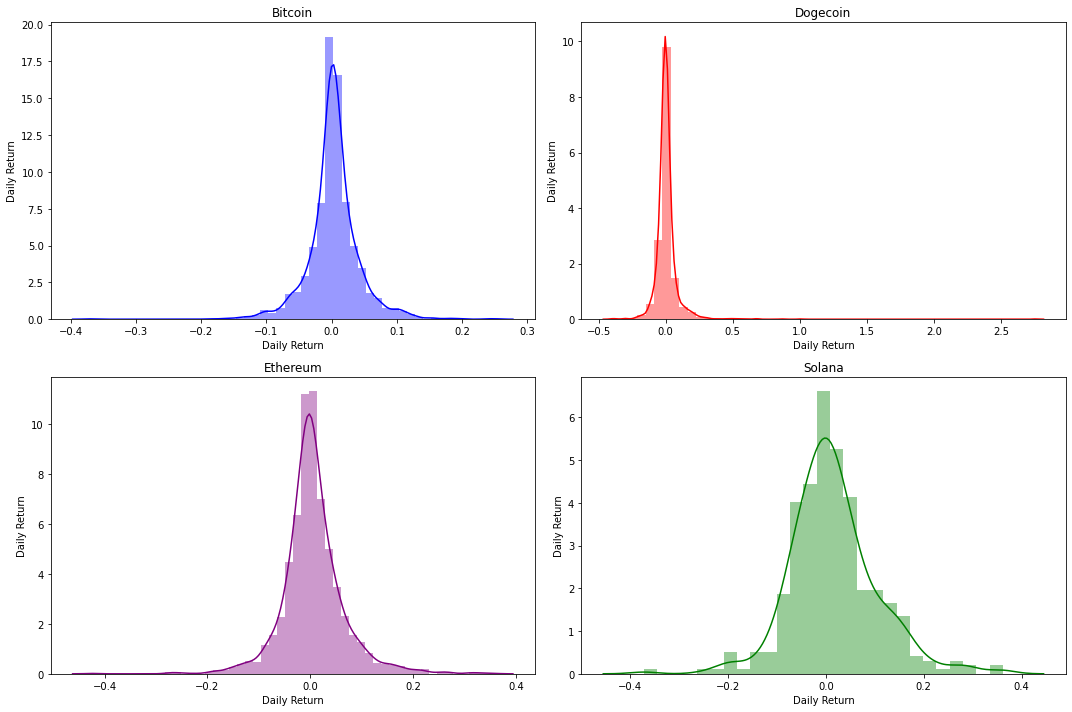

In [16]:
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
sns.distplot(df_bitcoin['Adj Close'].pct_change(),kde=True,color='blue')
plt.xlabel('Daily Return')
plt.ylabel('Daily Return')
plt.title('Bitcoin')

plt.subplot(2, 2, 2)
sns.distplot(df_dogecoin['Adj Close'].pct_change(),color='red')
plt.xlabel('Daily Return')
plt.ylabel('Daily Return')
plt.title('Dogecoin')

plt.subplot(2, 2, 3)
sns.distplot(df_ethereum['Adj Close'].pct_change(),color='purple')
plt.xlabel('Daily Return')
plt.ylabel('Daily Return')
plt.title('Ethereum')

plt.subplot(2, 2, 4)
sns.distplot(df_solana['Adj Close'].pct_change(),color='green')
plt.title('Solana')
plt.xlabel('Daily Return')
plt.ylabel('Daily Return')

fig.tight_layout()

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [43]:
final_df=df_ethereum[['Date','Close']]

In [44]:
final_df=final_df[final_df.Date>'2020-09']

In [45]:
final_df.head()

,Date,Close
1816,2020-09-02,440.040497
1817,2020-09-03,385.671936
1818,2020-09-04,388.241150
1819,2020-09-05,335.260071
1820,2020-09-06,353.362274


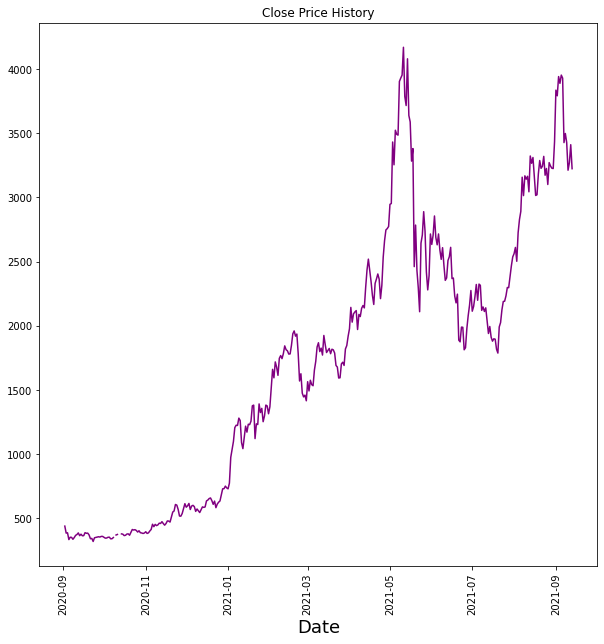

In [46]:
fig = plt.figure(figsize = (10,10))
plt.plot(final_df.Date,final_df.Close,color='purple')
plt.title('Close Price History')
plt.xlabel('Date',fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [47]:
final_df=final_df.set_index('Date')

In [48]:
data=final_df.filter(['Close'])

In [49]:
data.head()

,Close
Date,
2020-09-02,440.040497
2020-09-03,385.671936
2020-09-04,388.241150
2020-09-05,335.260071
2020-09-06,353.362274


In [50]:
data.isna().sum()

Close    3
dtype: int64

In [51]:
data=data.dropna(subset=['Close'])

In [52]:
data.shape

(374, 1)

In [53]:
dataset=data.values
training_data_len=int(np.ceil(len(dataset)*0.8))
training_data_len

300

In [54]:
mms=MinMaxScaler(feature_range=(0,1))
scaled_data=mms.fit_transform(dataset)

In [55]:
train_data=scaled_data[0:training_data_len ,:]
len(train_data)

300

In [56]:
X_train=[]
y_train=[]

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [57]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape


(240, 60, 1)

In [58]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [59]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [60]:
model.fit(X_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
240/240 [==============================] - 4s 8ms/step - loss: 0.0099
Epoch 2/2
240/240 [==============================] - 2s 8ms/step - loss: 0.0046


In [61]:
test_data=scaled_data[training_data_len-60:621:,:]

X_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [62]:
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(74, 60, 1)

In [63]:
predictions=model.predict(X_test)
predictions=mms.inverse_transform(predictions)

In [64]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

In [65]:
train

,Close
Date,
2020-09-02,440.040497
2020-09-03,385.671936
2020-09-04,388.241150
2020-09-05,335.260071
2020-09-06,353.362274
...,...
2021-06-27,1978.894653
2021-06-28,2079.657471
2021-06-29,2160.768311


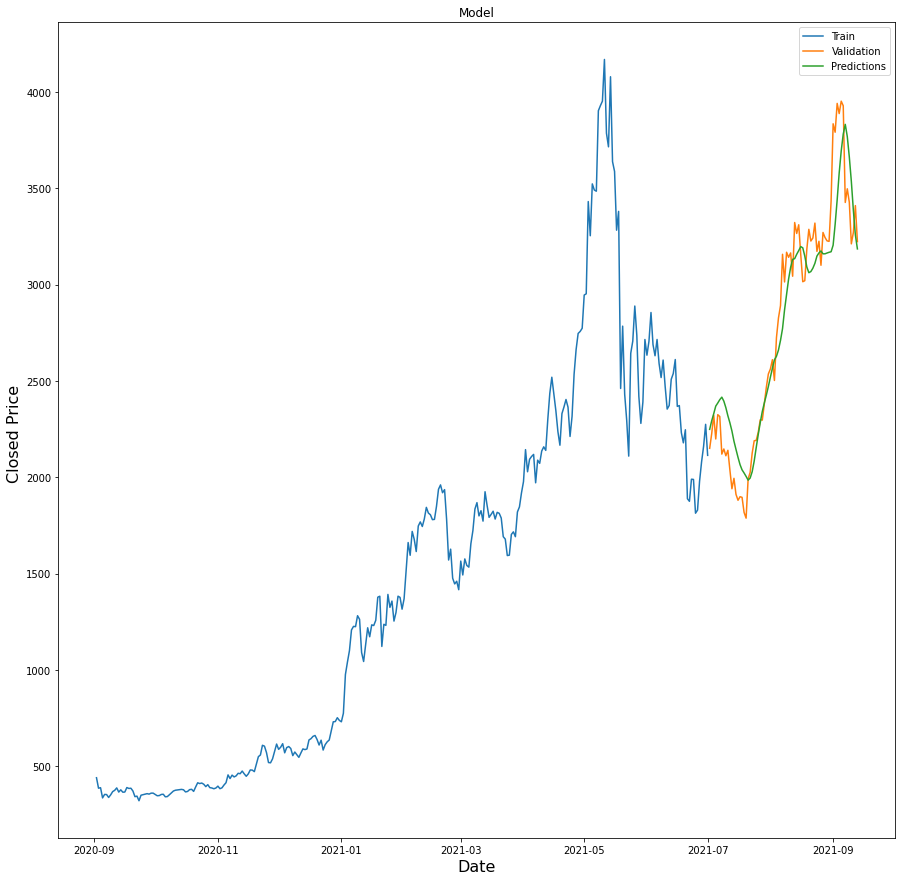

In [66]:
plt.figure(figsize=(15,15))
plt.title('Model')

plt.xlabel('Date',fontsize=16)
plt.ylabel('Closed Price ',fontsize=16)

plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

plt.legend(['Train','Validation','Predictions'])
plt.show()